# ANALYSING PROPERTY GAZETTEER DATASET

This dataset shows the types of properties in Westminster, using the postcode to identify the properties. 

# SECTION A

In [5]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
import pysal
from shapely.geometry import Point

In [6]:
#reading in data
properties = pd.read_csv('PropertyGazetteer.csv')

In [7]:
#printing columns of dataframe
properties.columns

Index([u'UPRN', u'Address', u'Postcode', u'StreetName', u'PropertyType',
       u'PrimaryClassification', u'SecondaryClassification', u'Borough',
       u'Lat', u'Long'],
      dtype='object')

In [8]:
#printing few records
properties.head(1)

,UPRN,Address,Postcode,StreetName,PropertyType,PrimaryClassification,SecondaryClassification,Borough,Lat,Long
0,10033527075,Flat 1 24 Hill Road London NW8 9QG,NW8 9QG,Hill Road,Property,Residential,Dwellings,Westminster,51.53203,-0.180347


In [9]:
#making a copy of dataframe
prop = properties.copy()

In [10]:
#reading shapefile from another notebook
%store -r complete_wards

In [8]:
#creating geometry points of dataframe
prop['geometry'] = [Point(xy) for xy in zip(properties.Long, properties.Lat)]

In [9]:
#creating a geodataframe and setting to the right coordinate reference system (crs)
prop_gdf = gpd.GeoDataFrame(prop, crs={'init' :'epsg:4326'})

In [10]:
#setting both dataframes to same crs
prop_gdf = prop_gdf.to_crs(complete_wards.crs)

In [11]:
#creating a spatial join of shape file and geodataframe
prop_gdf_join = gpd.sjoin(prop_gdf, complete_wards, how="inner", op='intersects')


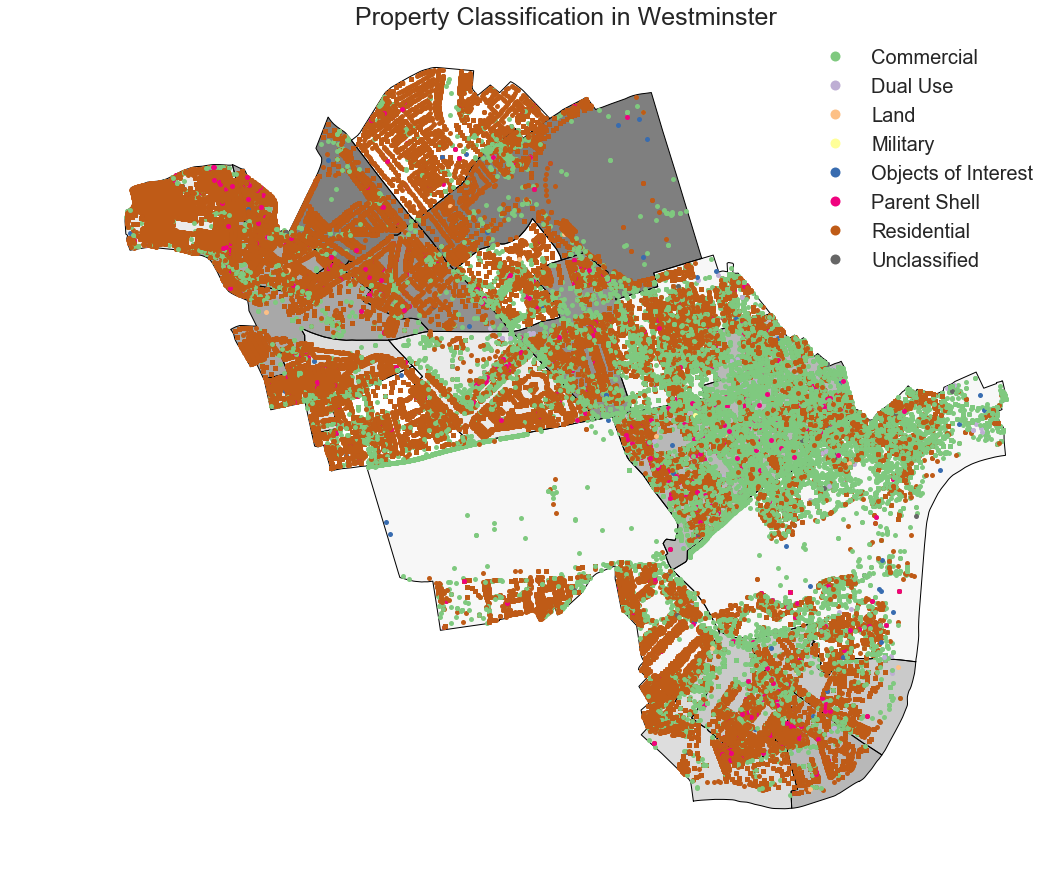

In [12]:
#plotting properties in Westminster overlaid on Westminster map
sns.set(font_scale=2 )
base = complete_wards.plot(figsize=(20,15))
prop_gdf_join.plot(ax=base, marker='o', cmap='Accent', markersize=5, column='PrimaryClassification',legend=True,alpha=1)
plt.title('Property Classification in Westminster',fontsize=25)
plt.axis('off')
#saving figure
plt.savefig('/Users/jamessolomon/Desktop/plots/properties.png')

# SECTION B

This section creates dataframe of residential and commercial properties to use in R for statistical analysis. The 
dataframe was exported to DATAFRAME FOR ALL notebook file

In [13]:
#selecting attributes of interest
prop_gdf_join2 = prop_gdf_join.ix[:,['PrimaryClassification','NAME']]

In [15]:
#renaming column
prop_gdf_join2 = prop_gdf_join2.rename(columns={'NAME':'Ward'})

In [19]:
#creating dataframe of count of properties by ward
prop_grp1 = pd.DataFrame(prop_gdf_join2.groupby(['Ward','PrimaryClassification'])['Ward'].count())

In [24]:
#renaming column
prop_grp1 = prop_grp1.rename(columns={'Ward':'Total'})

In [25]:
#resetting index
prop_grp1 = prop_grp1.reset_index()

In [32]:
#residential
prop_grp_res = pd.DataFrame(prop_grp1[prop_grp1.PrimaryClassification=='Residential'].groupby(['Ward'])['Total'].sum())

In [39]:
#renaming column
prop_grp_res = prop_grp_res.rename(columns={'Total': 'Residential'})

In [35]:
#commercial
prop_grp_com = pd.DataFrame(prop_grp1[prop_grp1.PrimaryClassification=='Commercial'].groupby(['Ward'])['Total'].sum())

In [40]:
#renaming column
prop_grp_com = prop_grp_com.rename(columns={'Total':'Commercial'})

In [41]:
#storing dataframe to use in DATAFRAME FOR ALL notebook file
%store prop_grp_res

Stored 'prop_grp_res' (DataFrame)


In [42]:
#storing dataframe to use in DATAFRAME FOR ALL notebook file
%store prop_grp_com

Stored 'prop_grp_com' (DataFrame)
